In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

### classification : consommation du carburant

In [2]:
# Load the data
data = pd.read_csv('aircraft_emissions_data.csv')

In [3]:
data['emission_nox'][0]

8.020637094969777

In [4]:
# Group the data by aircraft type and aggregate the CO2 emissions as a list

grouped = data.groupby('type_avion')['emission_nox'].apply(list)
print(grouped)

max_len = max([len(x) for x in grouped])
# Create a list of arrays of CO2 emissions, with padding to the maximum length
co2_list = [np.pad(np.array(x), (0, max_len - len(x)), 'constant', constant_values=np.mean(x)) for x in grouped]

# Convert the list of arrays to a numpy array
co2_array = np.vstack(co2_list)

# Convert the aggregated CO2 emissions to a numpy array
#co2_array = np.array(grouped.tolist())

# Normalize the data
normalized = (co2_array - co2_array.mean()) / co2_array.std()

# Set the number of clusters
k = 3

# Fit the K-Means clustering model
model = KMeans(n_clusters=k)
model.fit(normalized)

# Get the predicted clusters for each aircraft type
clusters = model.predict(normalized)

# Add the cluster assignments to the original dataframe
data['cluster'] = data['type_avion'].apply(lambda x: clusters[grouped.index.get_loc(x)])

# Print the results
print(data)

type_avion
A319    [27.32345215482201, 12.446145893782145, 18.072...
A320    [5.647612333863196, 28.27082410709055, 15.4165...
A321    [9.816522381072836, 15.113738086674678, 19.062...
B737                                 [11.222521742325997]
B738    [8.020637094969777, 7.888900518985786, 21.9937...
E190               [6.906859070324554, 6.168810235375144]
Name: emission_nox, dtype: object
    Unnamed: 0 type_avion  emission_co2  emission_h2o  emission_sox  \
0            0       B738   2093.434017    817.695726      0.558426   
1            4       A319   4510.624666   1761.850854      1.203215   
2            5       A320   1726.433725    674.345342      0.460529   
3            7       A321   2347.101740    916.778387      0.626093   
4            8       A321   2671.502760   1043.489487      0.712627   
5            9       A321   3004.017174   1173.369681      0.801326   
6           10       A319   2720.294433   1062.547524      0.725642   
7           14       A321   2920.104774

c:\Users\chell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


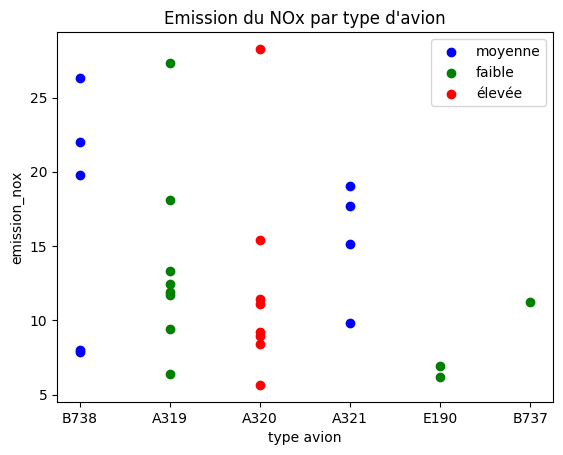

In [6]:
# Define a list of colors for each cluster
colors = ['b','g','r']
label = ["moyenne","faible","élevée"]
list = []

for i, row in data.iterrows():
    label_i = label[data['cluster'][i]]
    if list.__contains__(label_i) : 
        plt.scatter(row['type_avion'], row['emission_nox'], c = colors[data['cluster'][i]])
    else :
        list.append(label_i)
        plt.scatter(row['type_avion'], row['emission_nox'], c = colors[data['cluster'][i]], label = label[data['cluster'][i]])

plt.xlabel('type avion')
plt.ylabel('emission_nox')
plt.title("Emission du NOx par type d'avion")
plt.legend()
plt.show()